In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import gmaps
import os
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import g_key

# Save path to csv file in a variable
data_file="../Resources/clean_data.csv"

# Read data file using pandas library
data_file_df=pd.read_csv(data_file,encoding="UTF-8")

# Display dataframe
data_science_df=pd.DataFrame(data_file_df)
data_science_df.head()

,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,cassandra_yn,hive_yn,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,1,0
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Anam
# Find the unique total of companies
total_unique_companies=data_science_df['Company'].value_counts()
# Companies having max number of jobs (top 6)
max_company_jobs=total_unique_companies.iloc[0:6]
max_company_jobs

Deloitte             139
CSIRO                 78
Give A Grad A Go      60
Indeed                55
ANZ Banking Group     42
Commonwealth Bank     32
Name: Company, dtype: int64

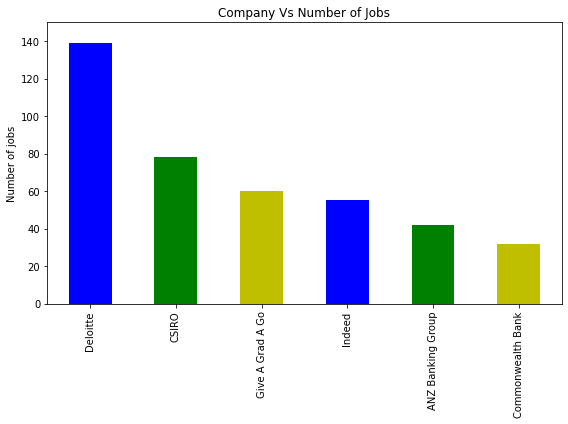

In [3]:
# Anam
# Bar plot displaying top 6 companies with max number of jobs
plt.figure(figsize=(8, 6))
max_company_jobs.plot.bar(color=['b','g','y'])
plt.ylim(0, 150)
plt.title("Company Vs Number of Jobs")
# plt.xlabel("Company")
plt.ylabel("Number of jobs")
plt.savefig("Output/Company Vs Number of Jobs.jpg")
plt.tight_layout()

In [4]:
# Anam
# Companies having greatest Estimate Low Salary
average_estimate_low=data_science_df.groupby(["Company"]).mean()[["Low Estimate"]]
top_low_salary=average_estimate_low.sort_values("Low Estimate",ascending=False)
# Top 6 companies in terms of greatest estimate low salary (mean)
top_low_estimate=top_low_salary.iloc[0:6]
top_low_estimate

,Low Estimate
Company,
Profusion Group,200000.000000
Indeed,175545.454545
MALTEM Australia,170000.000000
Techtronic Industries (TTI),168000.000000
Palo Alto Networks,153000.000000
Goodman Fielder,149000.000000


<Figure size 576x432 with 0 Axes>

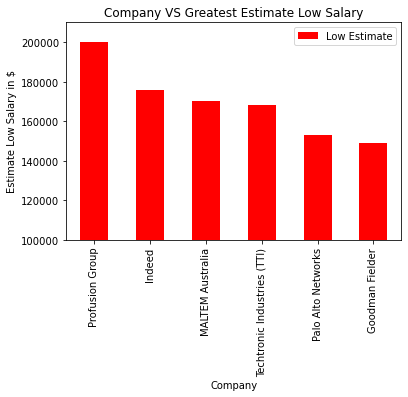

In [5]:
# Anam
# Bar plot displaying top 6 companies with greatest estimate low salary (mean)
plt.figure(figsize=(8, 6))
top_low_estimate.plot.bar(color='r')
plt.ylim(100000, 210000)
plt.title("Company VS Greatest Estimate Low Salary")
plt.ylabel("Estimate Low Salary in $")
plt.savefig("Output/Company Vs Estimate Low Salary in $.jpg")

In [6]:
# Anam
# Companies having greatest Estimate Base Salary
average_estimate_base=data_science_df.groupby(["Company"]).mean()[["Estimate Base Salary"]]
top_base_salary=average_estimate_base.sort_values("Estimate Base Salary",ascending=False)
# Top 6 companies in terms of greatest base estimate salary (mean)
top_base_estimate=top_base_salary.iloc[0:6]
top_base_estimate

,Estimate Base Salary
Company,
Indeed,215145.454545
Profusion Group,200000.000000
Techtronic Industries (TTI),181275.000000
MALTEM Australia,170000.000000
Palo Alto Networks,165476.000000
Microsoft,157901.000000


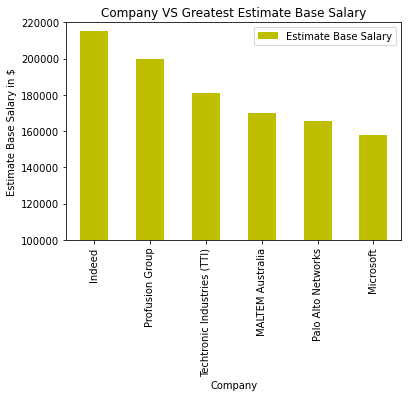

In [7]:
# Anam
# Bar plot displaying top 6 companies with greatest estimate base salary (mean)
# plt.figure(figsize=(8, 6))
top_base_estimate.plot.bar(color='y')
plt.ylim(100000, 220000)
plt.title("Company VS Greatest Estimate Base Salary")
plt.ylabel("Estimate Base Salary in $")
plt.savefig("Output/Company Vs Estimate Base Salary in $.jpg")

In [8]:
# Anam
# Companies having greatest Estimate High Salary
average_estimate_high=data_science_df.groupby(["Company"]).mean()[["High Estimate"]]
top_high_salary=average_estimate_high.sort_values("High Estimate",ascending=False)
# Top 6 companies in terms of greatest high estimate salary (mean)
top_high_estimate=top_high_salary.iloc[0:6]
top_high_estimate

,High Estimate
Company,
Indeed,254745.454545
Profusion Group,200000.000000
United Nations,199000.000000
Techtronic Industries (TTI),196000.000000
Palo Alto Networks,179000.000000
Nearmap,179000.000000


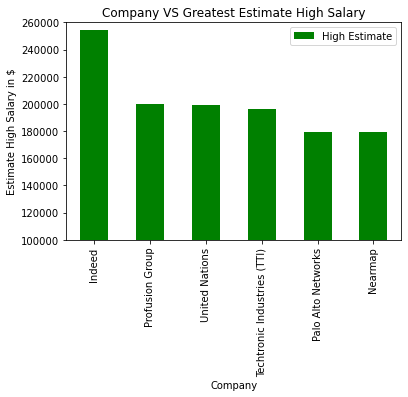

In [9]:
# Anam
# Bar plot displaying top 6 companies with greatest estimate high salary (mean)
top_high_estimate.plot.bar(color='g')
plt.ylim(100000, 260000)
plt.title("Company VS Greatest Estimate High Salary")
plt.ylabel("Estimate High Salary in $")
plt.savefig("Output/Company Vs Estimate High Salary in $.jpg")

In [10]:
# Anam
# Calculating number of jobs for each job title
title_df=data_science_df['Job Title'].value_counts()
title_df

Data Scientist                   155
Data Analyst                     114
Machine Learning Engineer         71
Clinical Research Associate       43
Graduate Research Fellow          41
                                ... 
Platform Engineer                  1
Planning Analyst                   1
Geologist                          1
Lead Product Specialist            1
Information Security Engineer      1
Name: Job Title, Length: 148, dtype: int64

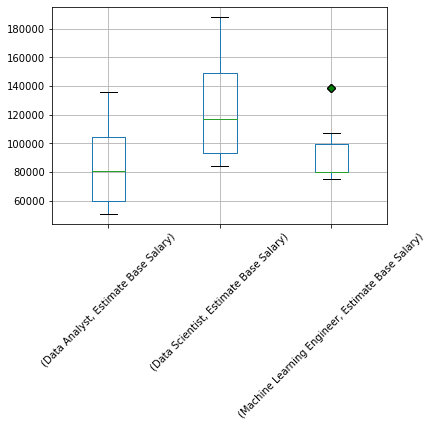

In [11]:
# Anam
# Top 3 job titles with highest number of jobs 
top_three=list(title_df.iloc[0:3].index)

# Finding Estimate Base Salary for top three job titles
top_three=data_science_df[data_science_df["Job Title"].isin(top_three)][["Job Title", "Estimate Base Salary"]]

# Groupby top three job titles with estimate base salary
grouped_top_three=top_three.groupby("Job Title")

# Box plot
green_diamond = dict(markerfacecolor='g', marker='D')
grouped_top_three.boxplot("Estimate Base Salary", rot=45, flierprops=green_diamond)
plt.savefig("Output/Top 3 Titles with Highest Salaries.jpg")

In [12]:
# Anam
# Find the unique job titles and extract top 5 and bottom 5 job titles in terms of salary
# Excluding odd titles
exclusion_list=["Housekeeper","Brewer Trainee","Technician"]
exluding_titles = data_science_df[~data_science_df["Job Title"].isin(exclusion_list)]
# Sorting job titles in terms of estimate base salary
job_title=exluding_titles.groupby(["Job Title"]).mean()[["Estimate Base Salary"]]
title_salary=job_title.sort_values("Estimate Base Salary", ascending=False)
title_salary

,Estimate Base Salary
Job Title,
"Technical Fellow, Job Seeker",295000.000000
Senior Product Manager,209000.000000
Graduate Software Developer,196115.000000
Software Engineer,185573.307692
Lead Analytics Consultant,181275.000000
...,...
Planning Analyst,61631.000000
Office Administrator,55561.000000
Lead Group Manager,54387.000000


In [13]:
# Anam
# Top 5 job titles with highest estimate base salary salaries
top_five_titles=title_salary.iloc[0:5]
top_five_titles

,Estimate Base Salary
Job Title,
"Technical Fellow, Job Seeker",295000.000000
Senior Product Manager,209000.000000
Graduate Software Developer,196115.000000
Software Engineer,185573.307692
Lead Analytics Consultant,181275.000000


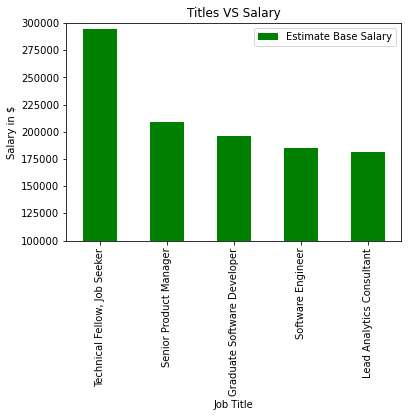

In [14]:
# Anam
# Bar plot displaying top 5 job titles with highest estimate base salary salaries (mean)
top_five_titles.plot.bar(color='g')
plt.ylim(100000, 300000)
plt.title("Titles VS Salary")
plt.ylabel("Salary in $")
plt.savefig("Output/Top Title Vs Salary in $.jpg")

In [15]:
# Bottom 5 job titles with highest estimated base salaries(mean)
bottom_five_titles=title_salary.iloc[-5:]
bottom_five_titles

,Estimate Base Salary
Job Title,
Planning Analyst,61631.0
Office Administrator,55561.0
Lead Group Manager,54387.0
Lab Assistant,51997.0
Associate QA Analyst,51381.0


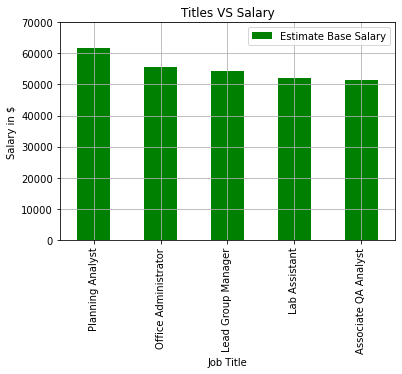

In [16]:
# Anam
# Bar plot displaying bottom 5 job titles with salaries (mean)
bottom_five_titles.plot.bar(color='g')
plt.ylim(0, 70000)
plt.title("Titles VS Salary")
plt.ylabel("Salary in $")
plt.grid()
plt.savefig("Output/Bottom Title Vs Salary in $.jpg")

In [17]:
# Anam
# Top companies in terms of employee satisfaction
employee_satisfaction_opp=data_science_df.groupby(["Company"]).mean()["Company Career Opportinities"]
employee_satisfaction_benefits=data_science_df.groupby(["Company"]).mean()["Compensation and Benefits"]
employee_satisfaction_values=data_science_df.groupby(["Company"]).mean()["Company Culture and Values"]
employee_satisfaction_life=data_science_df.groupby(["Company"]).mean()["Company Work Life Balance"]                                                                 
employee_satisfaction=(employee_satisfaction_opp+employee_satisfaction_benefits+employee_satisfaction_values+employee_satisfaction_life)/4
# Employee satisfaction
employee_satisfaction=employee_satisfaction.sort_values(ascending=False)
top_employee_satisfaction=employee_satisfaction.iloc[0:10]
bottom_employee_satisfaction=employee_satisfaction.iloc[-10:]


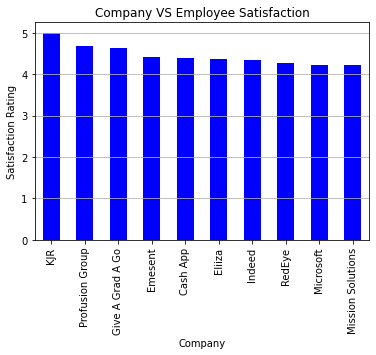

In [18]:
# Anam
# Bar plot displaying top companies in terms of employee satisfaction
top_employee_satisfaction.plot.bar(color='b')
plt.title("Company VS Employee Satisfaction")
plt.ylabel("Satisfaction Rating")
plt.grid(axis="y")
plt.savefig("Output/Top Employee Satisfaction.jpg")

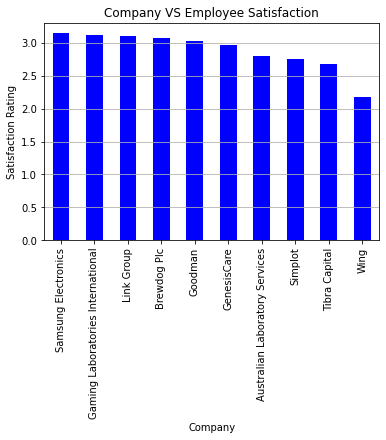

In [19]:
# Anam
# Bar plot displaying bottom companies in terms of employee satisfaction
bottom_employee_satisfaction.plot.bar(color='b')
plt.title("Company VS Employee Satisfaction")
plt.ylabel("Satisfaction Rating")
plt.grid(axis="y")
plt.savefig("Output/Bottom Employee Satisfaction.jpg")

In [20]:
# Anam
# Count for each technical skill and then find top 10
skills_df=data_science_df[['python_yn','r_yn','sql_yn','java_yn','julia_yn','scala_yn','c_yn','c++_yn','javascript_yn','spark_yn','hadoop_yn','matlab_yn','sas_yn','git_yn','excel_yn','nosql_yn','aws_yn','mongodb_yn','cassandra_yn','hive_yn','bigml_yn','tableau_yn','powerbi_yn','nlp_yn','pytorch_yn','tensorflow_yn','mathematic_yn','statistic_yn']]
skills_df.columns=['python','r','sql','java','julia','scala','c','c++','javascript','spark','hadoop','matlab','sas','git','excel','nosql','aws','mongodb','cassandra','hive','bigml','tableau','powerbi','nlp','pytorch','tensorflow','mathematic','statistic']

sum_df=skills_df.sum()
top=sum_df.sort_values(ascending=False)
top_ten_skills=top.iloc[0:10]
top_ten_skills

python        386
sql           338
mathematic    218
r             169
statistic     164
excel         162
aws           133
c++            98
tableau        94
powerbi        86
dtype: int64

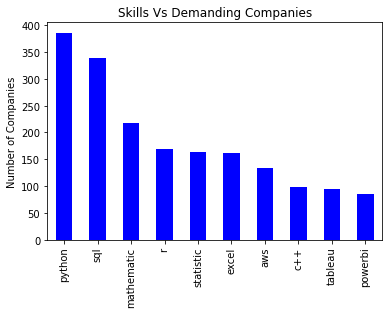

In [21]:
# Anam
# plotting top ten in demand skills
top_ten_skills.plot.bar(color='b')
plt.title("Skills Vs Demanding Companies")
plt.ylabel("Number of Companies")
plt.savefig("Output/Skills Vs Demanding Companies.jpg")

In [22]:
# Nishant
# Find the states with the highest and lowest number of job opportunities by using groupby method
grouped_state_jobs = data_science_df.groupby(["State"])["Job Title"]
state_jobs=grouped_state_jobs.count()
state_jobs

State
New South Wales       385
Northern Territory      6
Queensland            150
South Australia        68
Tasmania               12
Victoria              377
Western Australia     114
Name: Job Title, dtype: int64

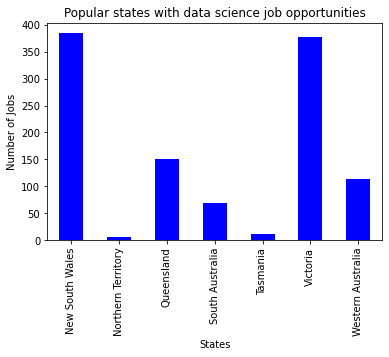

In [24]:
# Nishant
#Creating bar charts for data science job oppertunities by states
state_jobs.plot.bar(color='b')
plt.title("Popular states with data science job opportunities")
plt.xlabel("States")
plt.ylabel("Number of Jobs")
plt.savefig("Output/states vs Number of jobs.png")

In [25]:
# Nishant
# 9: The popular company type and then make a pie chart
data_science_df['Company Type'] = data_science_df['Company Type'].replace(['Government'],'Company - Public')
private=data_science_df.loc[data_science_df['Company Type']=="Company - Private"]
public=data_science_df.loc[data_science_df['Company Type'] =="Company - Public"]
merged_company_type=pd.concat([private, public], ignore_index=True, sort=False)
company_df = merged_company_type.groupby(["Company Type"])["Company"]
company_type=company_df.count()
company_type

Company Type
Company - Private    425
Company - Public     544
Name: Company, dtype: int64

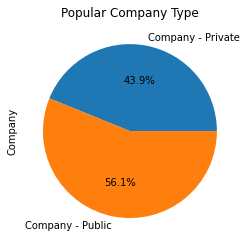

<Figure size 432x288 with 0 Axes>

In [27]:
# Nishant
# #Creating pie charts for data science job opportunities by popular company types
company_type.plot.pie(autopct= "%1.1f%%")
plt.title("Popular Company Type")
plt.show()
plt.savefig("Output/Job type vs job opportunities.png")

In [28]:
# Nishant
#remove string from column
data_science_df['Company Size Int'] = data_science_df['Company Size'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [29]:
# Nishant
# 10: Compare the size of the company using the bin and compare the salaries
#creating bins for size of companies
bins = [0, 1000, 5000, 11000000000]
#creating labels
group_size = ["Smaller", "Medium", "MNC"]

In [30]:
# Nishant
data_science_df["Size Of Company"] = pd.cut(data_science_df["Company Size Int"], bins, labels=group_size, include_lowest=True)
data_science_df

,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,bigml_yn,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn,Company Size Int,Size Of Company
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,1,0,10000.0,MNC
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,Data Scientist,Perth,GHD,97279,92000,103000,5001 to 10000 Employees,Company - Private,Management & Consulting,1928.0,...,0,0,1,0,0,0,0,0,500110000.0,MNC
1108,Lead Data Specialist,Perth,Accenture,152391,128000,182000,10000+ Employees,Company - Public,Management & Consulting,1989.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
1109,Lead Data Specialist,Perth,Accenture,152391,128000,182000,10000+ Employees,Company - Public,Management & Consulting,1989.0,...,0,0,0,0,0,0,0,0,10000.0,MNC
1110,Data Analyst,Jandakot,Schlumberger,135861,108000,171000,10000+ Employees,Company - Public,"Energy, Mining, Utilities",1926.0,...,0,0,0,0,0,0,0,0,10000.0,MNC


In [31]:
# Nishant
# 10: compare the salaries using the bin 
#creating bins for salary slot
bins = [0, 60000, 130000, 250000]
#creating labels
group_salary = ["Lower", "Median", "Highest"]

In [32]:
# Nishant
data_science_df["Estimated Salary"] = pd.cut(data_science_df["Estimate Base Salary"], bins, labels=group_salary, include_lowest=True)
data_science_df

,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,tableau_yn,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn,Company Size Int,Size Of Company,Estimated Salary
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,1,0,10000.0,MNC,Median
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,10000.0,MNC,Median
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,10000.0,MNC,Median
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,0,10000.0,MNC,Median
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,0,10000.0,MNC,Median
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,Data Scientist,Perth,GHD,97279,92000,103000,5001 to 10000 Employees,Company - Private,Management & Consulting,1928.0,...,0,1,0,0,0,0,0,500110000.0,MNC,Median
1108,Lead Data Specialist,Perth,Accenture,152391,128000,182000,10000+ Employees,Company - Public,Management & Consulting,1989.0,...,0,0,0,0,0,0,0,10000.0,MNC,Highest
1109,Lead Data Specialist,Perth,Accenture,152391,128000,182000,10000+ Employees,Company - Public,Management & Consulting,1989.0,...,0,0,0,0,0,0,0,10000.0,MNC,Highest
1110,Data Analyst,Jandakot,Schlumberger,135861,108000,171000,10000+ Employees,Company - Public,"Energy, Mining, Utilities",1926.0,...,0,0,0,0,0,0,0,10000.0,MNC,Highest


In [33]:
#Nishant use groupby for company type and estimate base salary and find mean estimate base salary for company types
overall_type_salary = data_science_df.groupby(["Company Type"]).mean()["Estimate Base Salary"]
overall_type_salary

round(overall_type_salary,2)

Company Type
College / University              100477.78
Company - Private                 110646.48
Company - Public                  100010.80
Hospital                           62590.74
Non-profit Organisation            86419.00
Subsidiary or Business Segment     92891.40
Name: Estimate Base Salary, dtype: float64

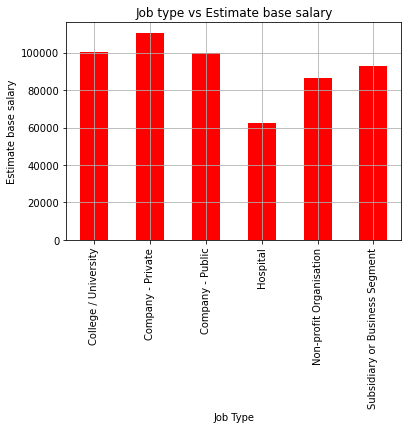

<Figure size 432x288 with 0 Axes>

In [34]:
# Nishant
#create bar graph company type vs Estimate base salary
overall_type_salary.plot.bar(color='r', grid = "true")
plt.title("Job type vs Estimate base salary")
plt.xlabel("Job Type")
plt.ylabel("Estimate base salary")
plt.show()
plt.savefig("Output/Job type vs Estimate Base Salary.png")

In [33]:
# John
# 11: Find top 10 and bottom 10 companies in terms of company ratings and employee satisfaction by setting conditions over 
#3.5 and less than 4 respectively

#Identifying Top 10 company

#creating conditions for each classification and groupby company with the mean of all employee satisfaction measures 

top_condition_rating = (data_science_df["Company Rating"]>3.5)
top_condition_career = (data_science_df["Company Career Opportinities"]>3.5)
top_condition_benefits = (data_science_df["Compensation and Benefits"]>3.5)
top_condition_culture = (data_science_df["Company Culture and Values"]>3.5)
top_condition_worklife = (data_science_df["Company Work Life Balance"]>3.5)

top_conditional_df = data_science_df.loc[top_condition_rating & top_condition_career & 
                                         top_condition_benefits & top_condition_culture & top_condition_worklife].dropna()

t_company_df = top_conditional_df.groupby(["Company"]).mean()[["Company Rating","Company Career Opportinities","Compensation and Benefits","Company Culture and Values","Company Work Life Balance"]]

top_company_df= t_company_df.sort_values(["Company Rating"], ascending =False)

top_company_df.head(10)

round(top_company_df.head(10),1)

,Company Rating,Company Career Opportinities,Compensation and Benefits,Company Culture and Values,Company Work Life Balance
Company,,,,,
Profusion Group,4.9,4.2,4.9,4.9,4.7
Give A Grad A Go,4.8,4.6,4.5,4.7,4.7
KJR,4.7,5.0,5.0,5.0,5.0
Eliiza,4.6,4.5,4.0,5.0,4.0
Mission Solutions,4.5,3.9,4.0,4.5,4.5
Fuse Recruitment,4.5,4.1,3.9,3.9,4.1
Defence Services,4.5,3.9,4.0,4.5,4.5
Cash App,4.5,4.5,4.3,4.6,4.2
RedEye,4.5,4.1,4.2,4.5,4.3


In [34]:
# John
#Identifying bottom 10 company

#creating conditions for each classification and groupby company with the mean of all employee satisfaction measures

bottom_condition_rating = (data_science_df["Company Rating"]<4)
bottom_condition_career = (data_science_df["Company Career Opportinities"]<4)
bottom_condition_benefits = (data_science_df["Compensation and Benefits"]<4)
bottom_condition_culture = (data_science_df["Company Culture and Values"]<4)
bottom_condition_worklife = (data_science_df["Company Work Life Balance"]<4)

bottom_conditional_df = data_science_df.loc[bottom_condition_rating & bottom_condition_career & 
                                         bottom_condition_benefits & bottom_condition_culture & bottom_condition_worklife].dropna()

b_company_df = bottom_conditional_df.groupby(["Company"]).mean()[["Company Rating","Company Career Opportinities","Compensation and Benefits","Company Culture and Values","Company Work Life Balance"]]

bottom_company_df= b_company_df.sort_values(["Company Rating"], ascending =True)

bottom_company_df.head(10)

,Company Rating,Company Career Opportinities,Compensation and Benefits,Company Culture and Values,Company Work Life Balance
Company,,,,,
Wing,2.1,1.8,2.7,2.0,2.2
Simplot,3.0,2.6,3.0,2.6,2.8
GenesisCare,3.0,3.2,3.0,3.0,2.7
Tibra Capital,3.1,2.7,2.8,2.5,2.7
Australian Laboratory Services,3.1,2.7,2.6,3.0,2.9
Link Group,3.2,3.1,2.8,3.2,3.3
DAC Enterprises Pty Ltd,3.3,3.3,3.6,3.2,2.7
Brewdog Plc,3.3,3.3,3.3,3.0,2.7
"Medpace, Inc.",3.3,3.4,2.9,3.2,3.1


In [35]:
# John
#Calculate correlation between Company rating and Estimated Base Salary by using linear regression 

company_rating = data_science_df.loc[data_science_df["Company Rating"]>=2]

company_data = company_rating.groupby(['Company']).mean()


st.pearsonr(company_data['Company Rating'],company_data['Estimate Base Salary'])[0]
correlation = st.pearsonr(company_data['Company Rating'],company_data['Estimate Base Salary'])[0]
correlation 

0.21443952658920828

The correlation for Average company rating vs. estimated base salary is 0.21443952658920828.


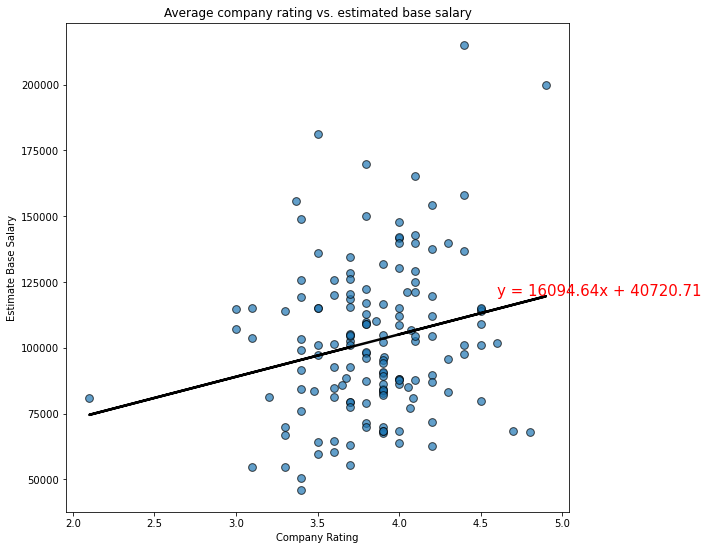

In [36]:
# John
#From the below linear chart we can conclude that company rating and Estimated Base Salary has a weak correlation.

company_rating = data_science_df.loc[data_science_df["Company Rating"]>=2]


company_data = company_rating.groupby(['Company']).mean()

# calculate linear regression equation and add line/equation to plot
x_values = company_data ['Company Rating']
y_values = company_data['Estimate Base Salary']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(company_data['Company Rating'],company_data['Estimate Base Salary'], s=60, alpha=0.7, edgecolors="k")
b, a = np.polyfit(company_data ['Company Rating'],company_data['Estimate Base Salary'], deg=1)
# Plot regression line
ax.plot(company_data['Company Rating'], a + b * company_data ['Company Rating'], color="k", lw=2.5);

# Annotate linear regression
plt.annotate(line_eq,(4.6,120000),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel('Company Rating')
plt.ylabel('Estimate Base Salary')
plt.title("Average company rating vs. estimated base salary")

print(f"""The correlation for Average company rating vs. estimated base salary is {(correlation)}.""")


In [37]:
# John
#Calculate correlation between Company rating and Compensaton and Benefits by using linear regression 

st.pearsonr(company_data['Company Rating'],company_data['Compensation and Benefits'])[0]
correlation = st.pearsonr(company_data['Company Rating'],company_data['Compensation and Benefits'])[0]
correlation 

0.7065956495007671

The correlation for Average company rating vs. Compensation and Benefits rating is 0.7065956495007671.


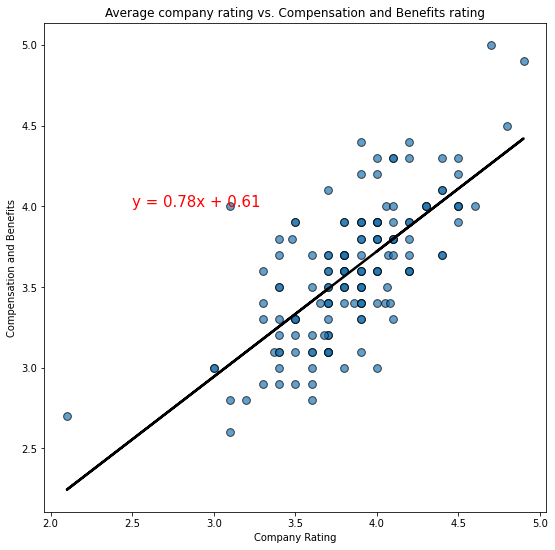

In [38]:
# John
#From the below linear chart we can conclude that company rating and Compensaton and Benefits has a strong correlation.

company_rating = data_science_df.loc[data_science_df["Company Rating"]>=2]


company_data = company_rating.groupby(['Company']).mean()

# calculate linear regression equation and add line/equation to plot
x_values = company_data ['Company Rating']
y_values = company_data['Compensation and Benefits']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(company_data['Company Rating'],company_data['Compensation and Benefits'], s=60, alpha=0.7, edgecolors="k")
b, a = np.polyfit(company_data ['Company Rating'],company_data['Compensation and Benefits'], deg=1)
# Plot regression line
ax.plot(company_data['Company Rating'], a + b * company_data ['Company Rating'], color="k", lw=2.5);

# Annotate linear regression
plt.annotate(line_eq,(2.5,4.0),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel('Company Rating')
plt.ylabel('Compensation and Benefits')
plt.title("Average company rating vs. Compensation and Benefits rating")

print(f"""The correlation for Average company rating vs. Compensation and Benefits rating is {(correlation)}.""")

In [39]:
# John
# 13:  Using gmaps API to create a heatmap that we can use to visualize which locations have more employment opportunities
#and highest estimated salary when it comes to data science.


#Creating a filtered df that doesn't include "Australia" in the Job location and doing a groupby with Job location 
#and average Estimate Base Salary to identify the estimated base salary for each location

filtered_data_science = (data_science_df["Job Location"]!= "Australia")

updated_data_science_df = data_science_df.loc[filtered_data_science]

average_salary_job_location = updated_data_science_df.groupby(["Job Location"]).mean()["Estimate Base Salary"]

average_salary_job_location

round(average_salary_job_location,2)

Job Location
Adelaide              97493.34
Alice Springs        115000.00
Bella Vista          105365.00
Bowen Hills           84905.00
Braeside              64092.00
Bridgetown           147860.00
Brisbane              95443.99
Broadbeach           154417.00
Bunbury              169706.00
Darlinghurst          97417.00
Darwin               100623.00
East Brisbane         64607.50
Eight Mile Plains     85000.00
Fortitude Valley      93579.50
Hawthorn East        118481.00
Helensvale           155000.00
Hobart               102885.22
Jandakot             135861.00
Melbourne             93768.35
Mile End              79704.50
Mulgrave              75888.77
Murarrie              54690.00
Newcastle             86983.00
North Shore          116841.00
North Sydney          94107.00
Perth                102492.30
Richmond             137392.00
Smithton              55561.00
Southbank             86920.54
Stafford              54652.00
Sydney               100588.51
Thebarton             7147

In [40]:
# John
#Preforming a groupby with Job location and count Estimate Base Salary to identify the number of job opportunities per location 

count_salary_job_location = updated_data_science_df.groupby(["Job Location"]).count()["Estimate Base Salary"]

count_salary_job_location

round(count_salary_job_location,2)

Job Location
Adelaide              58
Alice Springs          1
Bella Vista            1
Bowen Hills            1
Braeside               1
Bridgetown             5
Brisbane             128
Broadbeach             1
Bunbury                1
Darlinghurst           1
Darwin                 3
East Brisbane          2
Eight Mile Plains      9
Fortitude Valley       2
Hawthorn East          1
Helensvale             1
Hobart                 9
Jandakot               5
Melbourne            287
Mile End               2
Mulgrave              44
Murarrie               1
Newcastle             12
North Shore           25
North Sydney           7
Perth                 89
Richmond               1
Smithton               1
Southbank             24
Stafford               1
Sydney               313
Thebarton              2
Uxbridge               1
Waurn Ponds            1
Wollongong            18
Name: Estimate Base Salary, dtype: int64

In [41]:
# John
#Performing a groupby with Job location and max Estimate Base Salary to identify the max estimated base salary for each location

max_salary_job_location = updated_data_science_df.groupby(["Job Location"]).max()["Estimate Base Salary"]

max_salary_job_location

round(max_salary_job_location,2)

Job Location
Adelaide             188296
Alice Springs        115000
Bella Vista          105365
Bowen Hills           84905
Braeside              64092
Bridgetown           147860
Brisbane             200000
Broadbeach           154417
Bunbury              169706
Darlinghurst          97417
Darwin               136900
East Brisbane         77218
Eight Mile Plains     85000
Fortitude Valley      96052
Hawthorn East        118481
Helensvale           155000
Hobart               149000
Jandakot             135861
Melbourne            142178
Mile End              82182
Mulgrave              96555
Murarrie              54690
Newcastle             86983
North Shore          116841
North Sydney          94107
Perth                181275
Richmond             137392
Smithton              55561
Southbank            113842
Stafford              54652
Sydney               209000
Thebarton             79290
Uxbridge              95331
Waurn Ponds           68356
Wollongong           115000
Name: E

In [42]:
# John
#Create a DF with Max_salary,Average_Salary and Count_Jobs

summary_df = pd.DataFrame({
    "Max_salary": max_salary_job_location,
    "Average_Salary": average_salary_job_location,
    "Count_Jobs": count_salary_job_location
    
})
summary_df.reset_index(inplace = True)
summary_df

#Add job location and State column to created DF
summary_df = summary_df.merge(updated_data_science_df[["Job Location","State"]],how = "left",on = "Job Location")
summary_df 

,Job Location,Max_salary,Average_Salary,Count_Jobs,State
0,Adelaide,188296,97493.344828,58,South Australia
1,Adelaide,188296,97493.344828,58,South Australia
2,Adelaide,188296,97493.344828,58,South Australia
3,Adelaide,188296,97493.344828,58,South Australia
4,Adelaide,188296,97493.344828,58,South Australia
...,...,...,...,...,...
1054,Wollongong,115000,114351.500000,18,New South Wales
1055,Wollongong,115000,114351.500000,18,New South Wales
1056,Wollongong,115000,114351.500000,18,New South Wales
1057,Wollongong,115000,114351.500000,18,New South Wales


In [43]:
# John
#Set up json response and base url to make an geocode API request 

def get_location_coordinates(location):
    
    address = location.replace(",", "+")
    #print(address)
    # Define the base url
    geo_url = f"https://maps.googleapis.com/maps/api/geocode/json?address={address}&key={g_key}" # 6
    response = requests.get(geo_url) # 7
    content = response.content.decode("utf8") # 8
    geo_js = json.loads(content) # 9
    geo_status = geo_js["status"] # 10
    if geo_status == "OK": # 11
        geo_elements = geo_js["results"][0] # 12
        geometry = geo_elements["geometry"] # 13
        location_coordinates = geometry["location"] # 14
        location_lat = location_coordinates["lat"] # 15
        location_long = location_coordinates["lng"] # 16
        print(f"Long/lat coordinates successfully extracted.") #17
    else: # 18
        location_lat = "Unavailable" # 19
        location_long = "Unavailable" # 20
        print(f"Long/lat coordinates unavailable.") # 21
        
    return location_lat, location_long

In [44]:
# John
# Identify list of locations, and list for lat/long. Then run a for loop to extract all lat and long coordinates for each location
list_cities = summary_df["Job Location"].unique()
lat_list = []
lng_list = []


for i in list_cities:
   
    loc_lat, loc_long = get_location_coordinates(location=i) #25
    lat_list.append(loc_lat)
    lng_list.append(loc_long)

Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat coordinates successfully extracted.
Long/lat c

In [45]:
# John
#Create a DF with job location, lat, and long

coor_df = pd.DataFrame({
    "Job Location": list_cities,
    "lat": lat_list,
    "lng": lng_list
    
})

coor_df

#Merge this df with previous summary df 

new_summary_df = summary_df.merge(coor_df,how = "left",on = "Job Location")
new_summary_df

,Job Location,Max_salary,Average_Salary,Count_Jobs,State,lat,lng
0,Adelaide,188296,97493.344828,58,South Australia,-34.928499,138.600746
1,Adelaide,188296,97493.344828,58,South Australia,-34.928499,138.600746
2,Adelaide,188296,97493.344828,58,South Australia,-34.928499,138.600746
3,Adelaide,188296,97493.344828,58,South Australia,-34.928499,138.600746
4,Adelaide,188296,97493.344828,58,South Australia,-34.928499,138.600746
...,...,...,...,...,...,...,...
1054,Wollongong,115000,114351.500000,18,New South Wales,-34.424834,150.893113
1055,Wollongong,115000,114351.500000,18,New South Wales,-34.424834,150.893113
1056,Wollongong,115000,114351.500000,18,New South Wales,-34.424834,150.893113
1057,Wollongong,115000,114351.500000,18,New South Wales,-34.424834,150.893113


In [46]:
# John
# Using the template add job location, max salary and number of job opportunities to the heatmap
info_box_template = """
<dl>
<dt>City</dt><dd>{Job Location}</dd>
<dt>Max Salary</dt><dd>{Max_salary}</dd>
<dt>Number of Opportunities</dt><dd>{Count_Jobs}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
salary_info = [info_box_template.format(**row) for index, row in new_summary_df.iterrows()]
locations = new_summary_df[["lat", "lng"]]

In [47]:
# John
#Populate heat map layer for all job locations

fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(
   new_summary_df[['lat', 'lng']], weights= new_summary_df['Count_Jobs'],
    max_intensity=60, point_radius=15
)
fig.add_layer(heatmap_layer)

# Add marker layer ontop of heat map
marker_layer = gmaps.marker_layer(locations, info_box_content=salary_info)
fig.add_layer(marker_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [48]:
# John
# 12: Define metro and regional by using conditional statements and find the number of opportunities in metro vs regional

list_regional_location = ["Bella Vista","Bowen Hills", "Braeside", "Bridgetown", "Bunbury","Helensvale","Jandakot","Mile End","Smithton","Thebarton","Uxbridge","Waurn Ponds","Wollongong"]



regional_location = updated_data_science_df[updated_data_science_df["Job Location"].isin(list_regional_location)]


metro_location = updated_data_science_df[~updated_data_science_df["Job Location"].isin(list_regional_location)]

In [49]:
# John
#add a new column called location type to classify location as "regional" and metro and merge them into a data frame 

regional_location['Location Type'] = 'Regional'

metro_location['Location Type'] = 'Metro'

merged_location= pd.concat([metro_location, regional_location], ignore_index=True, sort=False)
merged_location

C:\Users\User\AppData\Local\Temp\ipykernel_22112\2385330302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regional_location['Location Type'] = 'Regional'
C:\Users\User\AppData\Local\Temp\ipykernel_22112\2385330302.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro_location['Location Type'] = 'Metro'


,Job Title,Job Location,Company,Estimate Base Salary,Low Estimate,High Estimate,Company Size,Company Type,Company Sector,Company Founded,...,powerbi_yn,nlp_yn,pytorch_yn,tensorflow_yn,mathematic_yn,statistic_yn,Company Size Int,Size Of Company,Estimated Salary,Location Type
0,Analyst,Melbourne,ANZ Banking Group,95917,80000,115000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,1,0,10000.0,MNC,Median,Metro
1,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,10000.0,MNC,Median,Metro
2,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,10000.0,MNC,Median,Metro
3,Clinical Research Associate,Mulgrave,Bristol Myers Squibb,96555,79000,118000,10000+ Employees,Company - Public,Pharmaceutical & Biotechnology,1858.0,...,0,0,0,0,0,0,10000.0,MNC,Median,Metro
4,Data Scientist,Melbourne,ANZ Banking Group,115631,94000,143000,10000+ Employees,Company - Public,Finance,1835.0,...,0,0,0,0,0,0,10000.0,MNC,Median,Metro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,Data Analyst,Jandakot,Schlumberger,135861,108000,171000,10000+ Employees,Company - Public,"Energy, Mining, Utilities",1926.0,...,0,0,0,0,0,0,10000.0,MNC,Highest,Regional
1055,Program Manager,Bridgetown,United Nations,147860,110000,199000,10000+ Employees,Company - Public,Government & Public Administration,1945.0,...,0,0,0,0,0,0,10000.0,MNC,Highest,Regional
1056,Program Manager,Bridgetown,United Nations,147860,110000,199000,10000+ Employees,Company - Public,Government & Public Administration,1945.0,...,0,0,0,0,0,0,10000.0,MNC,Highest,Regional
1057,Data Analyst,Jandakot,Schlumberger,135861,108000,171000,10000+ Employees,Company - Public,"Energy, Mining, Utilities",1926.0,...,0,0,0,0,0,0,10000.0,MNC,Highest,Regional


In [50]:
# John
#Calculate average salary based on location type

overall_location_salary = merged_location.groupby(["Location Type"]).mean()["Estimate Base Salary"]
overall_location_salary

round(overall_location_salary,2)

Location Type
Metro        96642.79
Regional    114440.10
Name: Estimate Base Salary, dtype: float64

In [51]:
# John
#Calculate average salary based on regional locations

regional_salary = regional_location.groupby(["Job Location"]).mean()["Estimate Base Salary"]
regional_salary
round(regional_salary,2)

Job Location
Bella Vista    105365.0
Bowen Hills     84905.0
Braeside        64092.0
Bridgetown     147860.0
Bunbury        169706.0
Helensvale     155000.0
Jandakot       135861.0
Mile End        79704.5
Smithton        55561.0
Thebarton       71473.5
Uxbridge        95331.0
Waurn Ponds     68356.0
Wollongong     114351.5
Name: Estimate Base Salary, dtype: float64

In [52]:
# John
#Calculate average salary based on metro locations

metro_salary = metro_location.groupby(["Job Location"]).mean()["Estimate Base Salary"]
metro_salary
round(metro_salary,2)

Job Location
Adelaide              97493.34
Alice Springs        115000.00
Brisbane              95443.99
Broadbeach           154417.00
Darlinghurst          97417.00
Darwin               100623.00
East Brisbane         64607.50
Eight Mile Plains     85000.00
Fortitude Valley      93579.50
Hawthorn East        118481.00
Hobart               102885.22
Melbourne             93768.35
Mulgrave              75888.77
Murarrie              54690.00
Newcastle             86983.00
North Shore          116841.00
North Sydney          94107.00
Perth                102492.30
Richmond             137392.00
Southbank             86920.54
Stafford              54652.00
Sydney               100588.51
Name: Estimate Base Salary, dtype: float64

In [53]:
# John
#Creating bar charts to display salary per location

def categorical_x_numeric(merged_location, numeric_column, categorical_column, number_of_rows):
    merged_location_grouped = merged_location.groupby(by=categorical_column).mean()[[numeric_column]].sort_values(by = numeric_column, ascending = False).reset_index()
    ax = sns.barplot(data=merged_location_grouped.head(number_of_rows), y =categorical_column, x=numeric_column)
    plt.title(Title, fontsize=15)
    plt.show()

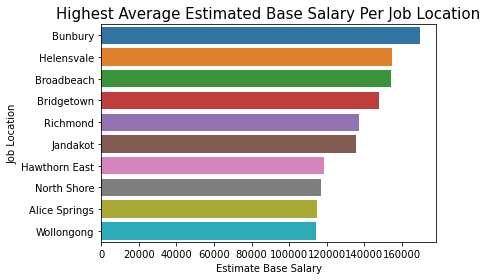

In [54]:
# John
#Creating bar chart to display Highest Average Estimated Base Salary Per Job Location

Title = "Highest Average Estimated Base Salary Per Job Location"
categorical_x_numeric(merged_location, 'Estimate Base Salary', 'Job Location', 10)

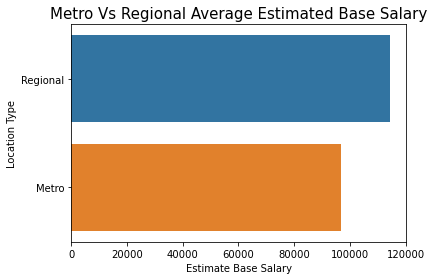

In [55]:
# John
#Creating bar chart to display Average Estimated Base Salary Per Job type

Title = "Metro Vs Regional Average Estimated Base Salary"
categorical_x_numeric(merged_location, 'Estimate Base Salary', 'Location Type', 10)

In [56]:
# John
#Top 10 locations for data science jobs
#Creating bar charts to display top 10 locations for data science jobs (Overall, Metro and Regional)

def bar_plot(dataframe, column_name, num, Title, Xlabel):
  plt.figure(figsize=(15,7))
  color = plt.cm.Paired(np.arange(len(dataframe)))
  dataframe[column_name].value_counts().head(num).plot.bar(color=color, rot=90)
  plt.title(Title, fontsize=15)
  plt.xlabel(Xlabel, fontsize=15)
  plt.ylabel("Count", fontsize=15)
  plt.xticks(fontsize=10, rotation=80)
  plt.yticks(fontsize=10)

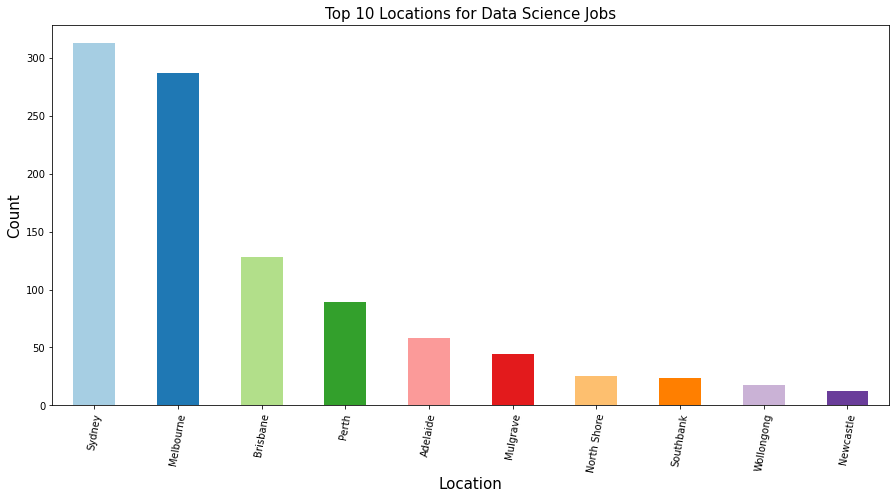

In [57]:
# John
Title = "Top 10 Locations for Data Science Jobs"
Xlabel = "Location"
bar_plot(updated_data_science_df, 'Job Location', 10, Title, Xlabel)

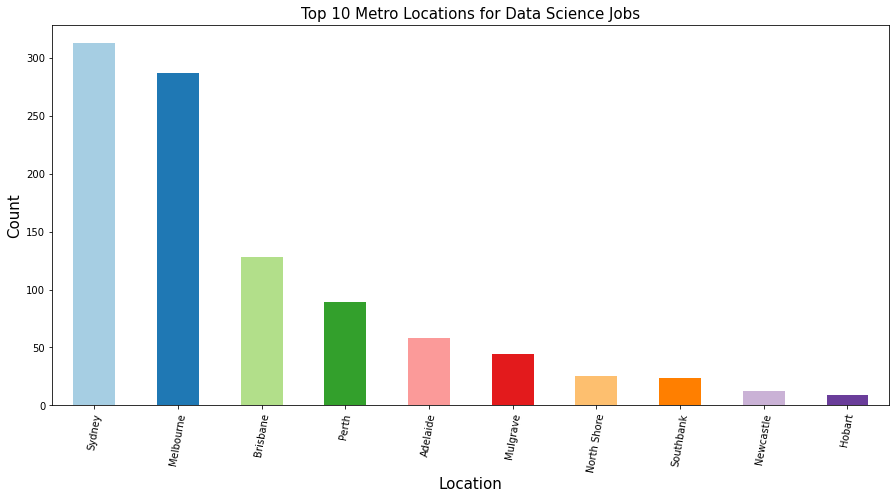

In [58]:
# John
Title = "Top 10 Metro Locations for Data Science Jobs"
Xlabel = "Location"
bar_plot(metro_location, 'Job Location', 10, Title, Xlabel)

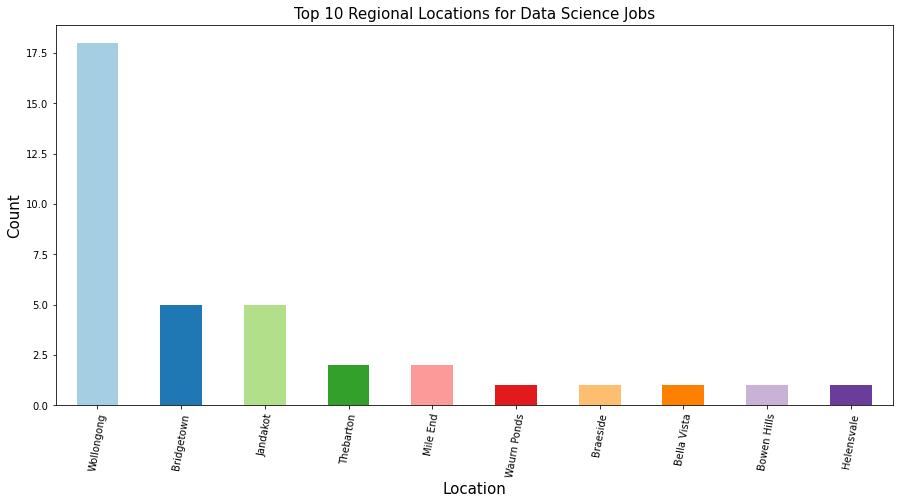

In [59]:
# John
Title = "Top 10 Regional Locations for Data Science Jobs"
Xlabel = "Location"
bar_plot(regional_location, 'Job Location', 10, Title, Xlabel)